# STUDENT MARK PREDICTION AND ANALYSIS

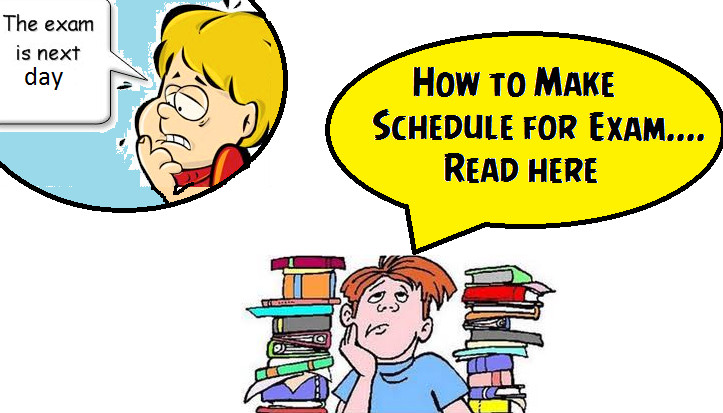

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target)



Download data at https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

In [2]:
pwd

'/home/vijay/Desktop/Studies/Data world/github/SkLearn'

In [3]:
ls

1 - classification (Gender Voice Classification).ipynb
 1 - Regression ( House Prices Advanced Regression).ipynb
2 - classification ( Bank Marketing with XGBOOST).ipynb
2 - Regression (Student math).ipynb
Data/


In [6]:
dataset=pd.read_csv("Data/student-mat.csv",sep=';')

In [7]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [9]:
categorical_features = dataset.select_dtypes(include=[np.object])
categorical_features.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [11]:
dataset.isnull().values.any()

False

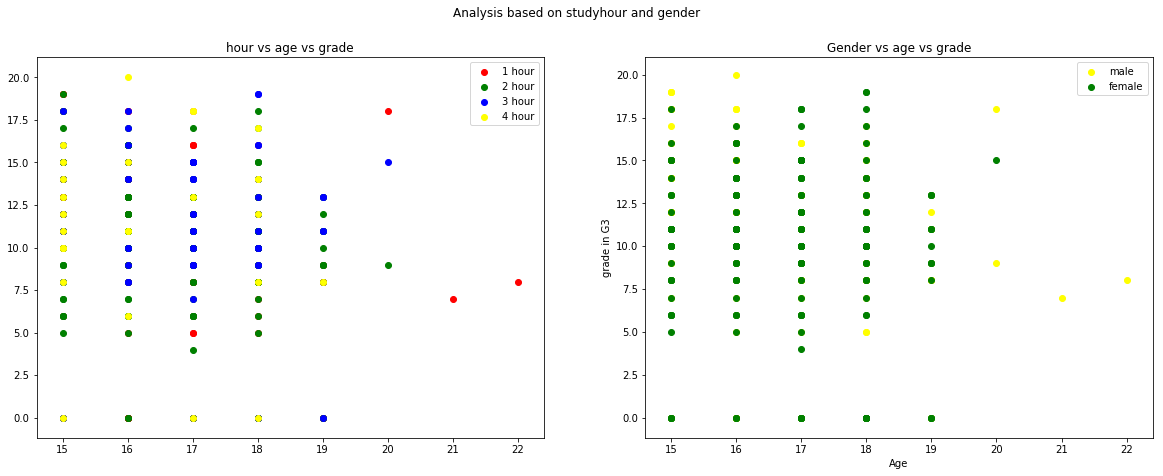

In [74]:
one_hour=dataset[dataset['studytime']==1]
two_hour=dataset[dataset['studytime']==2]
three_hour=dataset[dataset['studytime']==3]
four_hour=dataset[dataset['studytime']==4]

male=dataset[dataset['sex']=='M']
female=dataset[dataset['sex']=='F']


f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.suptitle('Analysis based on studyhour and gender')

ax1.set_title("hour vs age vs grade")
ax1.scatter(one_hour.age,one_hour.G3,color='red')
ax1.scatter(two_hour.age,two_hour.G3,color='green')
ax1.scatter(three_hour.age,three_hour.G3,color='blue')
ax1.scatter(four_hour.age,four_hour.G3,color='yellow')
ax1.legend(['1 hour','2 hour','3 hour','4 hour'])



ax2.set_title("Gender vs age vs grade")
ax2.scatter(male.age,male.G3,color='yellow')
ax2.scatter(female.age,female.G3,color='green')
ax2.legend(['male','female'])

plt.xlabel("Age")
plt.ylabel("grade in G3")

plt.show();

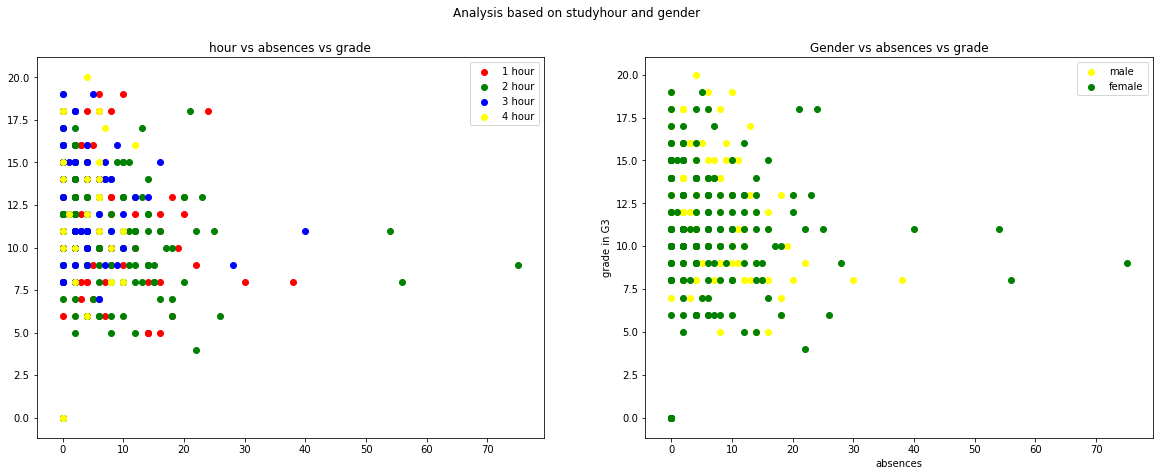

In [75]:
one_hour=dataset[dataset['studytime']==1]
two_hour=dataset[dataset['studytime']==2]
three_hour=dataset[dataset['studytime']==3]
four_hour=dataset[dataset['studytime']==4]

male=dataset[dataset['sex']=='M']
female=dataset[dataset['sex']=='F']


f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.suptitle('Analysis based on studyhour and gender')

ax1.set_title("hour vs absences vs grade")
ax1.scatter(one_hour.absences,one_hour.G3,color='red')
ax1.scatter(two_hour.absences,two_hour.G3,color='green')
ax1.scatter(three_hour.absences,three_hour.G3,color='blue')
ax1.scatter(four_hour.absences,four_hour.G3,color='yellow')
ax1.legend(['1 hour','2 hour','3 hour','4 hour'])



ax2.set_title("Gender vs absences vs grade")
ax2.scatter(male.absences,male.G3,color='yellow')
ax2.scatter(female.absences,female.G3,color='green')
ax2.legend(['male','female'])

plt.xlabel("absences")
plt.ylabel("grade in G3")

plt.show();

In [76]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [77]:
string_index=[]
for i,c in enumerate(x[0]):
    if type(c) == str:
        string_index.append(i)

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for i in string_index:
    labelencoder_X = LabelEncoder()
    x[:,i] = labelencoder_X.fit_transform(x[:,i])

In [79]:
x[0]

array([0, 0, 18, 1, 0, 0, 4, 4, 0, 4, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 4, 3, 4, 1, 1, 3, 6, 5, 6], dtype=object)

In [80]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [86]:
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [89]:
import math
from sklearn.metrics import mean_squared_error

In [96]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

mse = math.sqrt(mean_squared_error(ytest, lr.predict(xtest)))
print("RMSE: %.4f" % mse)

RMSE: 2.4041


In [97]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(xtrain,ytrain)

mse = math.sqrt(mean_squared_error(ytest, regressor.predict(xtest)))
print("RMSE: %.4f" % mse)

RMSE: 1.8413


In [98]:
from sklearn.svm import SVR
svr=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(xtrain,ytrain)

mse = math.sqrt(mean_squared_error(ytest, svr.predict(xtest)))
print("RMSE: %.4f" % mse)

RMSE: 3.4291


In [99]:
from sklearn import ensemble
params = {'n_estimators': 5000, 'max_depth': 10, 'min_samples_split': 5,
          'learning_rate': 0.001, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain,ytrain)

mse = math.sqrt(mean_squared_error(ytest, clf.predict(xtest)))
print("RMSE: %.4f" % mse)

RMSE: 1.9706


In [100]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = xtrain, y = ytrain, cv = 10)
print('accuracy_mean {0} accuracy_std {1}'.format(accuracies.mean(),accuracies.std()))

accuracy_mean 0.8317251193558409 accuracy_std 0.12718009054314125
